In [2]:
import numpy as np
import matplotlib.pyplot as plt

# "Particle" Class
A class which describes the properties of a particle.

In [8]:
class Particle():
    """
    x_pos = Position of Particle on x-axis.
    y_pos = Position of Particle on y-axis.
    vx = X-component of Velocity.
    vy = Y-component of Velocity.
    ax = X-component of Acceleration
    ay = Y-component of Acceleration
    colour = Colour of the particle
    """
    def __init__(self, x_pos, y_pos, colour, vx=0, vy=0, ax=0, ay=0):

        self.x = x_pos
        self.y = y_pos
        self.vx = vx
        self.vy = vy
        self.ax = ax
        self.ay = ay
        self.colour = colour

# "Create" class
A class to create multiple particles and assign random positions

In [103]:
class Create():
    """
        A class used to create particles with a particular colour.
        For example: 
                    green = Create(100, 'green')
        This will create 100 green coloured particles with random positions
                    
        Attributes:
        num = number of particles
        colour = colour of particles (e.g. 'green') (**string format**)
        x_limit = Range of x. (e.g. x_limit = 100 implies a range from 0 to 100 on x-axis)
        y_limit = Range of y. (e.g. y_limit = 220 implies a range from - to 220 on y-axis)
        """
    def __init__(self, num, colour, x_limit, y_limit):
        # size is the number of particle present.
        self.size = num
        self.colour = colour
        self.x_limit = x_limit
        self.y_limit = y_limit
        self.particle_list = self.create()
    
        
        # x and y component of positions of all particles
        self.x = [p.x for p in self.particle_list]
        self.y = [p.y for p in self.particle_list]
        
        # x and y velocity component of all particles
        self.vx = [p.vx for p in self.particle_list]
        self.vy = [p.vy for p in self.particle_list]
        
        # x and y acceleration component of all particles
        self.ax = [p.ax for p in self.particle_list]
        self.ay = [p.ay for p in self.particle_list]
                
    def create(self):
        # Creating an empty list to store particles.
        particle_list = []

        # Running a loop to generate particles:
        for i in range(self.size):
            # random x (integer between '0 to x_limit')
            ran_x = np.random.randint(0, self.x_limit)
            # random y (integer between '0 to y_limit')
            ran_y = np.random.randint(0, self.y_limit)
            
            # Creating a particle
            particle = Particle(x_pos=ran_x, y_pos=ran_y,colour=self.colour)
            
            # Addiing the particle in the list.
            particle_list.append(particle)
        # Returning the list
        
        #**Note: Particle velocity and acceleration are not updated and =0**
        return particle_list
    def update(self, x,y,vx,vy,ax,ay):
        """
        Updates the position, velocity and acceleration of all particles."""
        pass
    def plot(self, ax= None):
        """
        Plots the particles"""
        x_list, y_list, col = self.x, self.y, self.colour
        
        if ax is None:
            plt.scatter(x_list, y_list,c=col)
        else:
            ax.scatter(x_list, y_list,c=col)

In [123]:
green = Create(10, 'green', x_limit=100, y_limit=100)
red = Create(10,'red',x_limit=100,y_limit=100)

In [124]:
green.x

[15, 82, 38, 69, 94, 63, 73, 71, 69, 42]

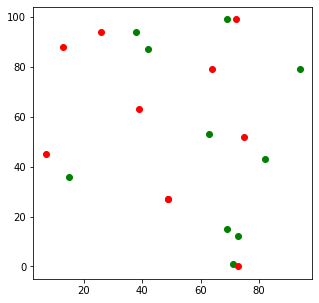

In [125]:
fig, ax = plt.subplots(1,1,figsize=(5,5))
green.plot(ax)
red.plot(ax)
plt.show()

In [126]:
#Main function :
def step(mass:'arr', x0:'arr',y0:'arr',vx0:'arr',vy0: 'arr',dt=0.1, G = 1):

    x1 = x0 + vx0*dt
    y1 = y0 +vy0*dt

    vx1 = []
    vy1 = []
    #Loop over planets to find the distance:
    for i in range(len(x1)):
        x1self = x1[i]
        y1self = y1[i]
        ax = 0
        ay = 0
        for j in range(len(x0)):
            if i == j:
                continue
            x_dist = x1[j] - x1self
            y_dist = y1[j] - y1self
            Rsq = x_dist**2 + y_dist**2

            # Contribution from the jth mass:
            a = G*mass[j]/Rsq
            ax += a * x_dist/np.sqrt(Rsq)
            ay += a * y_dist/np.sqrt(Rsq)
        vx1.append(vx0[i] + ax*dt)
        vy1.append(vy0[i] + ay*dt)

    return x1,y1,np.array(vx1),np.array(vy1)

In [135]:
green.size

10

In [140]:
def rule(particle1, particle2, force=10):
    """
    enter something later"""
    for i in range(particle1.size):
        fx = 0
        fy = 0
        for j in range(particle2.size):
            a = particle1.particle_list[i]
            b = particle2.particle_list[j]
            dx = a.x - b.x
            dy = a.y - b.y
            d = np.sqrt(dx**2 + dy**2)
            if d>0:
                F = force*1/d
                particle1.particle_list[i].ax +=(F*dx)
                particle1.particle_list[i].ay +=(F*dy)

        particle1.particle_list[i].vx = (particle1.particle_list[i].vx + particle1.particle_list[i].ax)
        particle1.particle_list[i].vy = (particle1.particle_list[i].vy + particle1.particle_list[i].ay)
        particle1.particle_list[i].x+=particle1.particle_list[i].vx
        particle1.particle_list[i].y+=particle1.particle_list[i].vy
        
            

In [141]:
from IPython.display import clear_output

In [144]:

for i in range(100):
    fig, ax = plt.subplots(1,1,figsize=(5,5))
    
    green.plot(ax)
    red.plot(ax)
    print(green.vx)
    rule(green,green,force=10)
    plt.show()
    clear_output(wait=True)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


KeyboardInterrupt: 